# Regressor Tree Concept


---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* github: https://github.com/prasertcbs
* kaggle: https://www.kaggle.com/prasertk
* [Chulalongkorn Business School, Thailand](https://www.cbs.chula.ac.th/en/home/)
---


In [49]:
from IPython.display import YouTubeVideo

# YouTubeVideo("CrlmjqHXhqI", width=720, height=405)

In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint

import ipywidgets as widgets
from ipywidgets import interact

%matplotlib inline
# %config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg'

In [51]:
print(f"pandas  version: {pd.__version__}")
print(f"numpy   version: {np.__version__}")
print(f"seaborn version: {sns.__version__}")
print(pd.Timestamp.now())

pandas  version: 2.1.4
numpy   version: 1.26.3
seaborn version: 0.12.2
2024-03-20 06:11:07.773269


In [52]:
url = "https://github.com/prasertcbs/basic-dataset/raw/master/food_tasty.csv"
df = pd.read_csv(url)
df

,sodium_mg,tasty
0,1,0.0
1,2,0.0
2,3,0.5
3,4,0.8
4,5,1.0
5,6,1.8
6,7,2.0
7,8,2.1
8,9,3.5
9,10,4.0


<Axes: xlabel='sodium_mg', ylabel='tasty'>

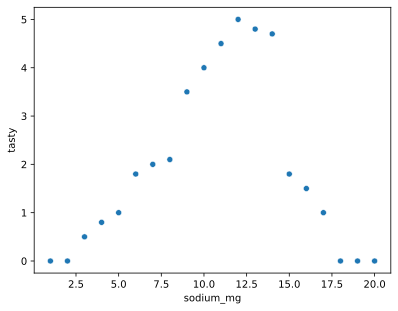

In [53]:
sns.scatterplot(data=df, x="sodium_mg", y="tasty")

---


## Regressor


In [54]:
# from sklearnex import patch_sklearn
# patch_sklearn()

In [55]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

print(f"scikit-learn version = {sklearn.__version__}")

scikit-learn version = 1.2.2


In [56]:
X = df[["sodium_mg"]]  # features
y = df["tasty"]  # label

In [57]:
# test_size = 0.2
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=test_size, random_state=7
# )
X_train = X
y_train = y

### Linear regression model


In [58]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.008670454286170637

### DecisionTree Regressor model


In [59]:
max_depth = 3
min_samples_split = 4
model = DecisionTreeRegressor(min_samples_split=min_samples_split, max_depth=max_depth)
pprint(model.get_params())
model.fit(X_train, y_train)

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


DecisionTreeRegressor(max_depth=3, min_samples_split=4)

In [60]:
model.score(X_train, y_train)

0.966645370814034

### tree diagram (better way)

-   **install graphviz on Windows**
1. install graphviz: `pip install -U graphviz`
2. `winget install Graphviz.Graphviz`
3. `dot --version`
4. (optional) add `C:\Program Files (x86)\Graphviz\bin` to `PATH` enviroment variable
5. `dot -Tpng sample.dot > x.png`

-   **install graphviz on macOS**
1. install graphviz: `pip install -U graphviz`
2. `sudo port install graphviz`
3. `dot --version`

In [61]:
model.__dict__

{'criterion': 'squared_error',
 'splitter': 'best',
 'max_depth': 3,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['sodium_mg'], dtype=object),
 'n_features_in_': 1,
 'n_outputs_': 1,
 'max_features_': 1,
 'tree_': <sklearn.tree._tree.Tree at 0x27c93e1a9c0>}

In [62]:
model.__dict__["tree_"]

In [63]:
type(model)

sklearn.tree._classes.DecisionTreeRegressor

In [64]:
from sklearn.tree import export_graphviz
from graphviz import Digraph, Source


def view_tree(model, X, save_tree_img=False):
    estimators = model
    dot_graph = export_graphviz(
        estimators,
        feature_names=X.columns,
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )    
    #     with open(f'tree{tree_index}.dot') as f:
    #         dot_graph = f.read()
    g = Source(dot_graph)
    if save_tree_img:
        g.render(f"tree", format="png", view=False, cleanup=True)
    return g

<Axes: xlabel='sodium_mg', ylabel='tasty'>

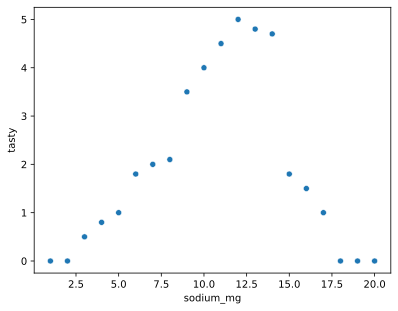

In [65]:
sns.scatterplot(data=df, x="sodium_mg", y="tasty")

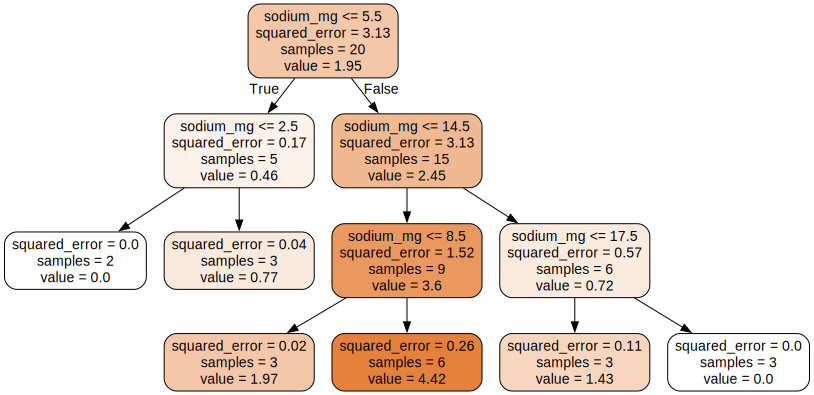

In [66]:
view_tree(model, X_train, save_tree_img=False)
# view_tree(model, X_train, save_tree_img=False)

In [67]:
df["tasty"].mean()

1.95

In [68]:
df[(df["sodium_mg"] <= 5.5)].agg(["count", "mean"])

,sodium_mg,tasty
count,5.0,5.00
mean,3.0,0.46


In [69]:
df[(df["sodium_mg"] >= 2.5) & (df["sodium_mg"] <= 5.5)].agg(["count", "mean"])

,sodium_mg,tasty
count,3.0,3.000000
mean,4.0,0.766667


In [70]:
df[(df["sodium_mg"] <= 2.5)]

,sodium_mg,tasty
0,1,0.0
1,2,0.0


In [71]:
df[(df["sodium_mg"] <= 2.5)].agg(["count", "mean"])

,sodium_mg,tasty
count,2.0,2.0
mean,1.5,0.0


In [72]:
df[(df["sodium_mg"] > 5.5)].agg(["count", "mean"])

,sodium_mg,tasty
count,15.0,15.000000
mean,13.0,2.446667


In [73]:
df[(df["sodium_mg"] > 5.5) & (df["sodium_mg"] <= 14.5)].agg(["count", "mean"])

,sodium_mg,tasty
count,9.0,9.0
mean,10.0,3.6


In [74]:
df[(df["sodium_mg"] > 5.5) & (df["sodium_mg"] <= 14.5)].agg(["count", "mean"])

,sodium_mg,tasty
count,9.0,9.0
mean,10.0,3.6


In [75]:
df[(df["sodium_mg"] > 14.5) & (df["sodium_mg"] <= 17.5)].agg(["count", "mean"])

,sodium_mg,tasty
count,3.0,3.000000
mean,16.0,1.433333


In [76]:
# for max_depth in [2, 3, 4]:
#     model = DecisionTreeRegressor(max_depth=max_depth)
#     model.fit(X_train, y_train)
#     g=view_tree(model, X_train, save_tree_img=False)
#     g.view() # pdf will be open in web browser

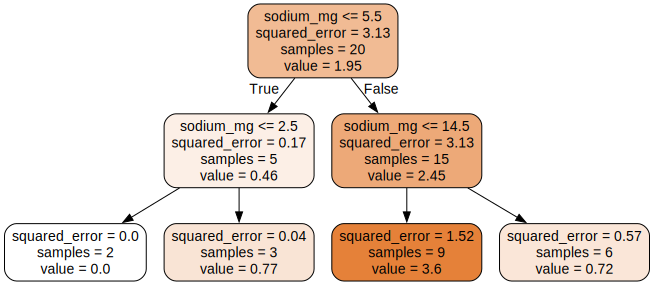

In [77]:
model = DecisionTreeRegressor(max_depth=2, min_samples_split=4)
model.fit(X_train, y_train)
g = view_tree(model, X_train, save_tree_img=False)
g

In [78]:
model.predict([[1], [2.6], [4], [11.4], [11.5], [13], [18]])

c:\Users\prasert\miniconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.        , 0.76666667, 0.76666667, 3.6       , 3.6       ,
       3.6       , 0.71666667])

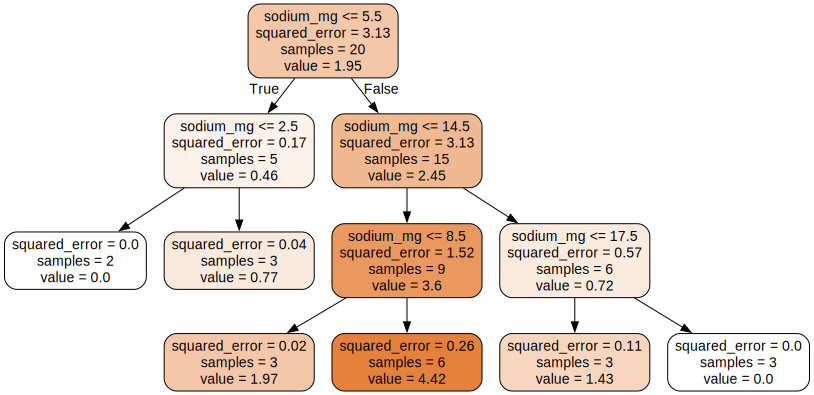

In [79]:
model = DecisionTreeRegressor(max_depth=3, min_samples_split=4)
model.fit(X_train, y_train)
g = view_tree(model, X_train, save_tree_img=False)
g

In [80]:
model.predict([[1], [2.6], [4], [11.4], [11.5], [13], [18]])

c:\Users\prasert\miniconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.        , 0.76666667, 0.76666667, 4.41666667, 4.41666667,
       4.41666667, 0.        ])

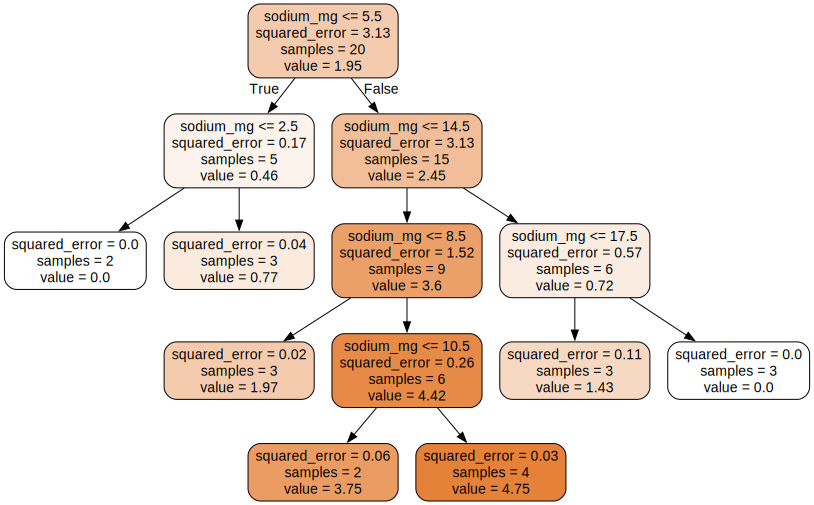

In [81]:
model = DecisionTreeRegressor(max_depth=4, min_samples_split=4)
model.fit(X_train, y_train)
g = view_tree(model, X_train, save_tree_img=False)
g

In [82]:
model.predict([[1], [2.6], [4], [11.4], [11.5], [13], [18]])

c:\Users\prasert\miniconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.        , 0.76666667, 0.76666667, 4.75      , 4.75      ,
       4.75      , 0.        ])

In [83]:
@interact(max_depth=list(range(2, 9)), min_samples_split=list(range(1, 11)))
def plot_chart(max_depth=2, min_samples_split=5):
    model = DecisionTreeRegressor(
        max_depth=max_depth, min_samples_split=min_samples_split
    )
    model.fit(X_train, y_train)
    g = view_tree(model, X_train, save_tree_img=False)
    # print(model.predict([[1], [2.6], [4], [11.4], [11.5], [13], [18]]))
    X_p = pd.DataFrame([1, 2.6, 4, 11.4], columns=["sodium_mg"])
    print(model.predict(X_p))
    return g

interactive(children=(Dropdown(description='max_depth', options=(2, 3, 4, 5, 6, 7, 8), value=2), Dropdown(desc…

In [84]:
df

,sodium_mg,tasty
0,1,0.0
1,2,0.0
2,3,0.5
3,4,0.8
4,5,1.0
5,6,1.8
6,7,2.0
7,8,2.1
8,9,3.5
9,10,4.0


In [85]:
u0 = df["tasty"].mean()
u0

1.95

In [86]:
((df.loc[:, "tasty"] - u0) ** 2).mean()

3.1305000000000005

In [87]:
u1 = df[df["sodium_mg"] <= 5.5]["tasty"].mean()

In [88]:
((df.loc[df["sodium_mg"] <= 5.5, "tasty"] - u1) ** 2).mean()

0.16640000000000002

In [89]:
u2 = df[df["sodium_mg"] > 5.5]["tasty"].mean()

In [90]:
((df.loc[df["sodium_mg"] > 5.5, "tasty"] - u2) ** 2).mean()

3.131822222222222

In [91]:
model.tree_

In [92]:
import sklearn

help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

[Text(0.4090909090909091, 0.9, 'x[0] <= 5.5\nsquared_error = 3.13\nsamples = 20\nvalue = 1.95'),
 Text(0.18181818181818182, 0.7, 'x[0] <= 2.5\nsquared_error = 0.166\nsamples = 5\nvalue = 0.46'),
 Text(0.09090909090909091, 0.5, 'squared_error = 0.0\nsamples = 2\nvalue = 0.0'),
 Text(0.2727272727272727, 0.5, 'squared_error = 0.042\nsamples = 3\nvalue = 0.767'),
 Text(0.6363636363636364, 0.7, 'x[0] <= 14.5\nsquared_error = 3.132\nsamples = 15\nvalue = 2.447'),
 Text(0.45454545454545453, 0.5, 'x[0] <= 8.5\nsquared_error = 1.516\nsamples = 9\nvalue = 3.6'),
 Text(0.36363636363636365, 0.3, 'squared_error = 0.016\nsamples = 3\nvalue = 1.967'),
 Text(0.5454545454545454, 0.3, 'x[0] <= 10.5\nsquared_error = 0.265\nsamples = 6\nvalue = 4.417'),
 Text(0.45454545454545453, 0.1, 'squared_error = 0.062\nsamples = 2\nvalue = 3.75'),
 Text(0.6363636363636364, 0.1, 'squared_error = 0.032\nsamples = 4\nvalue = 4.75'),
 Text(0.8181818181818182, 0.5, 'x[0] <= 17.5\nsquared_error = 0.568\nsamples = 6\nvalue

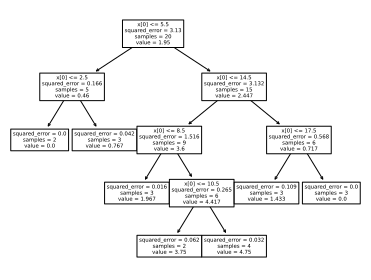

In [93]:
sklearn.tree.plot_tree(model)

In [94]:
def mse(y: np.array) -> float:
    """mean squared error (deviate from mean)

    Args:
        y (np.array): _description_

    Returns:
        float: MSE
    """
    y_bar = y.mean()
    return ((y - y_bar) ** 2).mean()

In [95]:
mse(df.loc[df["sodium_mg"] > 5.5, "tasty"])

3.131822222222222

In [96]:
y = np.array([3, 4, 9])
print(y.mean())
mse(y)

5.333333333333333


6.888888888888888